In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [179]:
#Q.1 - Predict delivery time using sorting time 
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model

## Load the data

In [180]:
data = pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Simple LR\\delivery_time.csv')

In [181]:
data

,Delivery Time,Sorting Time,Sqrt sorting time
0,21.00,10,3.162278
1,13.50,4,2.000000
2,19.75,6,2.449490
3,24.00,9,3.000000
4,29.00,10,3.162278
5,15.35,6,2.449490
6,19.00,7,2.645751
7,9.50,3,1.732051
8,17.90,10,3.162278
9,18.75,9,3.000000


# EDA & Visualization

In [182]:
data.describe()

,Delivery Time,Sorting Time,Sqrt sorting time
count,21.000000,21.000000,21.000000
mean,16.790952,6.190476,2.433008
std,5.074901,2.542028,0.533381
min,8.000000,2.000000,1.414214
25%,13.500000,4.000000,2.000000
50%,17.830000,6.000000,2.449490
75%,19.750000,8.000000,2.828427
max,29.000000,10.000000,3.162278


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Delivery Time      21 non-null     float64
 1   Sorting Time       21 non-null     int64  
 2   Sqrt sorting time  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

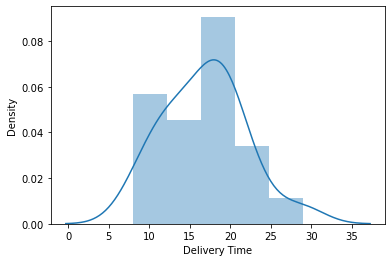

In [184]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

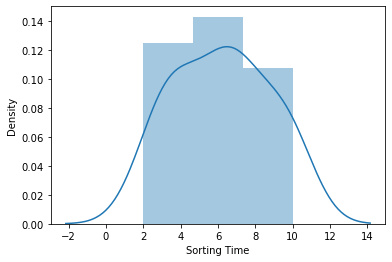

In [185]:
sns.distplot(data['Sorting Time'])

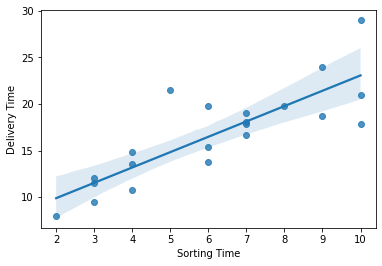

In [186]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [187]:
# Correlation 
data.corr()

,Delivery Time,Sorting Time,Sqrt sorting time
Delivery Time,1.000000,0.825997,0.834150
Sorting Time,0.825997,1.000000,0.994704
Sqrt sorting time,0.834150,0.994704,1.000000


In [188]:
#Mark response variable(y) & the predictor(x)
x=data.iloc[:,0].values
y=data.iloc[:,1].values
x,y

(array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
        18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
         8.  , 17.83, 21.5 ]),
 array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
         7,  2,  7,  5], dtype=int64))

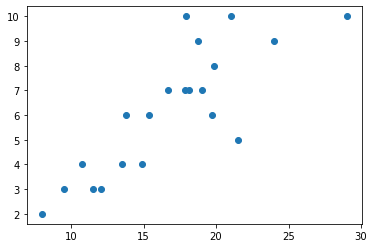

In [189]:
# Check the linear pattern in between x,y
plt.scatter(x,y)

In [190]:
# Reshape the data using array.reshape(-1,1) if the data has one feature
regressor=LinearRegression()
regressor.fit(x.reshape(-1,1),y)

LinearRegression()

In [191]:
#Corelation & Intercept value 
print(regressor.coef_)
print(regressor.intercept_)

[0.41374363]
-0.7566733660351286


In [192]:
# get the r-resqaured value
y_pred=regressor.predict(x.reshape(-1,1))
y_pred
r2_score(y,y_pred)

0.682271474841723

# Transformation

In [193]:
y_new=np.sqrt(y)
y_new

array([3.16227766, 2.        , 2.44948974, 3.        , 3.16227766,
       2.44948974, 2.64575131, 1.73205081, 3.16227766, 3.        ,
       2.82842712, 2.        , 2.64575131, 1.73205081, 1.73205081,
       2.        , 2.44948974, 2.64575131, 1.41421356, 2.64575131,
       2.23606798])

In [194]:
regressor1=LinearRegression()
regressor1.fit(x.reshape(-1,1),y_new)

print(regressor1.coef_)
print(regressor1.intercept_)


y_pred1=regressor1.predict(x.reshape(-1,1))
y_pred1

r2_score(y_new,y_pred1)

[0.08767067]
0.9609339829284425


0.695806227630867

# Fit  & Prediction on the model

In [195]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x.reshape(-1,1),y,train_size=0.80,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


In [196]:
model_fit=LinearRegression()
model_fit.fit(x_train,y_train)

LinearRegression()

In [197]:
lm=LinearRegression(fit_intercept=True)
model_fit=lm.fit(x_train,y_train)

In [198]:
lm.coef_

array([0.42391171])

In [199]:
lm.intercept_


-0.8511588772839991

In [200]:
# Train Data Prediction
y_pred_Train=model_fit.predict(x_train)
y_pred_Train

array([ 7.55501026,  4.24849895,  2.54013477,  7.20316354,  6.70718685,
       11.44228061,  7.52109732,  5.65588581,  4.97762708,  7.09718562,
        3.17600233,  6.82588212,  9.32272207,  8.05098696,  5.45664731,
        6.21968838])

In [201]:
# Test Data Prediction
y_pred=model_fit.predict(x_test)
y_pred

array([6.73686067, 4.02382575, 8.26294281, 4.87164916, 3.70589197])

# Measuring Accuracy of Predictions

In [202]:
#R Square for Train Data
r2_score(y_train,y_pred_Train)

0.803819534436421

In [203]:
#R Square for Test Data
r2_score(y_test,y_pred)

0.24709853785644575

In [204]:
# Calculate Root mean squared error on Train Data
np.sqrt(mean_squared_error(y_train,y_pred_Train))

1.062091181109503

In [205]:
 # Calculate Root mean squared error on Test Data
np.sqrt(mean_squared_error(y_test,y_pred))

2.1535721503595586

# Plot the Test & Predict data

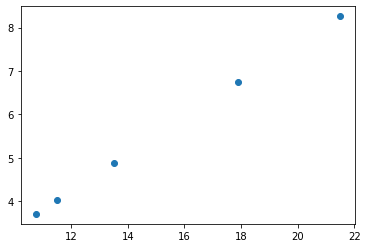

In [206]:
plt.scatter(x_test,y_pred)

In [207]:
#Q.2 Build a prediction model for Salary_hike
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model

# Import Data

In [208]:
df = pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Simple LR\\Salary_Data.csv')

In [209]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA & Visualization

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [211]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Plot the Data

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

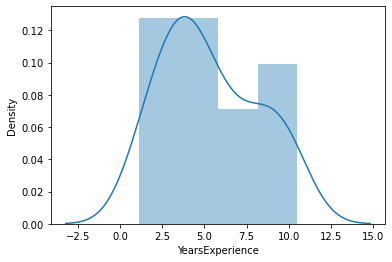

In [212]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

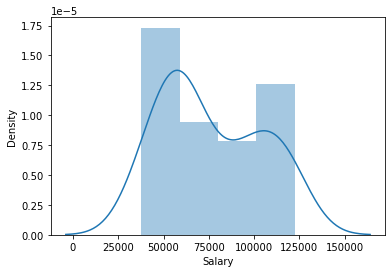

In [213]:
sns.distplot(df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

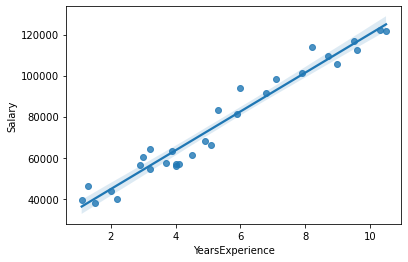

In [214]:
sns.regplot(x=df["YearsExperience"], y=df["Salary"])

In [215]:
# Correlation 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [216]:
# define response variable(y) & the predictor(x)
x=df.iloc[:,0].values
y=df.iloc[:,1].values
x,y

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

In [217]:
# Reshape the data using array.reshape(-1,1) if the data has one feature
regressor=LinearRegression()
regressor.fit(x.reshape(-1,1),y)

LinearRegression()

In [218]:
#Corelation & Intercept value 
print(regressor.coef_)
print(regressor.intercept_)

[9449.96232146]
25792.20019866871


In [219]:
# get the r-resqaured value
y_pred=regressor.predict(x.reshape(-1,1))
y_pred
r2_score(y,y_pred)

0.9569566641435086

# Transformation

In [220]:
y_new=np.sqrt(y)
y_new

array([198.35069952, 214.95348334, 194.24469105, 208.62646045,
       199.72731411, 237.99579828, 245.25496937, 233.33452381,
       253.86019775, 239.1422171 , 251.43189933, 236.20753587,
       238.65665715, 238.91630334, 247.2063915 , 260.64918952,
       256.96108655, 288.24989159, 285.24200252, 306.4963295 ,
       302.88281562, 313.48524686, 318.27975116, 337.36034147,
       330.80356709, 324.93383942, 342.00730986, 335.61138241,
       349.84425106, 349.10170438])

In [221]:
regressor1=LinearRegression()
regressor1.fit(x.reshape(-1,1),y_new)

print(regressor1.coef_)
print(regressor1.intercept_)


y_pred1=regressor1.predict(x.reshape(-1,1))
y_pred1

r2_score(y_new,y_pred1)

[17.05653205]
180.70022140543102


0.949835353386529

As you can see when transformed the data using sqrt(y) then r2 score has been drop down from 0.9569 to 0.9498.

# Fit the model & Prediction

In [222]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x.reshape(-1,1),y,train_size=0.80,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [223]:
model_fit=LinearRegression()
model_fit.fit(x_train,y_train)

LinearRegression()

In [224]:
lr=LinearRegression(fit_intercept=True)
model_fit=lr.fit(x_train,y_train)

In [225]:
lr.coef_

array([9312.57512673])

In [226]:
lr.intercept_

26780.099150628186

In [227]:
# Train Data Prediction
y_pred_Train=model_fit.predict(x_train)
y_pred_Train

array([116180.82036723,  64030.39965754,  76136.74732229, 100349.44265179,
        53786.56701814,  74274.23229695,  56580.33955616,  68686.68722091,
       103143.21518981,  90105.61001239,  38886.44681538, 124562.13798128,
        54717.82453082,  47267.76442943,  81724.29239833,  82655.549911  ,
        61236.62711953,  56580.33955616, 110593.27529119,  45405.24940409,
        37023.93179003,  92899.38255041,  72411.7172716 ,  64030.39965754])

In [228]:
# Test Data Prediction
y_pred=model_fit.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

# Checking the Accuracy

In [229]:
#R Square for Train Data
r2_score(y_train,y_pred_Train)

0.9411949620562126

In [230]:
#R Square for Test Data
r2_score(y_test,y_pred)

0.988169515729126

In [231]:
# Calculate Root mean squared error on Train Data
np.sqrt(mean_squared_error(y_train,y_pred_Train))

6012.459573099956

In [232]:
 # Calculate Root mean squared error on Test Data
np.sqrt(mean_squared_error(y_test,y_pred))

3580.979237321345

# Plot the Test & Predict data

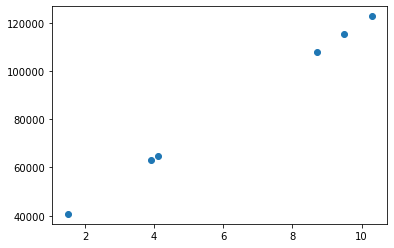

In [233]:
plt.scatter(x_test,y_pred)